In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##Data Cleaning

In [ ]:
content = pd.read_csv ('/content/drive/MyDrive/Accenture/Content.csv')
react_type = pd.read_csv ('/content/drive/MyDrive/Accenture/ReactionTypes.csv')
reactions = pd.read_csv ('/content/drive/MyDrive/Accenture/Reactions.csv')

In [ ]:
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [ ]:
content.isnull().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [ ]:
clean1 = content.dropna()

In [ ]:
clean1 = clean1.drop(['Unnamed: 0','URL'], axis = 1)

In [ ]:
clean1 = clean1.drop(['User ID'], axis = 1)

In [ ]:
clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  801 non-null    object
 1   Type        801 non-null    object
 2   Category    801 non-null    object
dtypes: object(3)
memory usage: 25.0+ KB


In [ ]:
clean1.isnull().sum()

Content ID    0
Type          0
Category      0
dtype: int64

In [ ]:
reactions.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [ ]:
reactions.isnull().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [ ]:
clean2 = reactions.drop(['Unnamed: 0'], axis = 1)

In [ ]:
clean2 = clean2.dropna()

In [ ]:
clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22534 entries, 1 to 25552
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  22534 non-null  object
 1   User ID     22534 non-null  object
 2   Type        22534 non-null  object
 3   Datetime    22534 non-null  object
dtypes: object(4)
memory usage: 880.2+ KB


In [ ]:
react_type.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [ ]:
react_type.isnull().sum()

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64

In [ ]:
clean3 = react_type.drop(['Unnamed: 0'], axis = 1)

In [ ]:
clean3.head()

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [ ]:
clean3.columns = clean3.columns.str.replace('Type', 'Reaction Type')

In [ ]:
clean3.head()

,Reaction Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [ ]:
merge1 = pd.merge(clean1, clean2, how = "left", on = "Content ID")

In [ ]:
merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18413 entries, 0 to 18412
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  18413 non-null  object
 1   Type_x      18413 non-null  object
 2   Category    18413 non-null  object
 3   User ID     18384 non-null  object
 4   Type_y      18384 non-null  object
 5   Datetime    18384 non-null  object
dtypes: object(6)
memory usage: 1007.0+ KB


In [ ]:
merge1 = merge1.drop(['User ID', 'Datetime'], axis = 1)

In [ ]:
merge1 = merge1.dropna()

In [ ]:
merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18384 entries, 0 to 18412
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  18384 non-null  object
 1   Type_x      18384 non-null  object
 2   Category    18384 non-null  object
 3   Type_y      18384 non-null  object
dtypes: object(4)
memory usage: 718.1+ KB


In [ ]:
merge1.columns = merge1.columns.str.replace('Type_x', 'Type')
merge1.columns = merge1.columns.str.replace('Type_y', 'Reaction Type')

In [ ]:
merge1.head()

,Content ID,Type,Category,Reaction Type
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,scared
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,interested


In [ ]:
clean_data = pd.merge(merge1, clean3, how = "left", on = "Reaction Type")
clean_data.head()

,Content ID,Type,Category,Reaction Type,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,scared,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,interested,positive,30


In [ ]:
clean_data.isnull().sum()

Content ID       0
Type             0
Category         0
Reaction Type    0
Sentiment        0
Score            0
dtype: int64

In [ ]:
clean_data.to_csv('clean_data.csv')

##Bussiness Insight

###Top 5 Performing Categories

In [ ]:
perf_cat = clean_data.groupby('Category')['Score'].sum().reset_index()
perf_cat.head()

,Category,Score
0,Studying,1176
1,animals,52443
2,cooking,49681
3,culture,47710
4,dogs,41816


In [ ]:
perf_cat = perf_cat.sort_values(by='Score', ascending=False)

In [ ]:
perf_cat

,Category,Score
15,travel,53935
10,science,53657
8,healthy eating,52745
1,animals,52443
2,cooking,49681
3,culture,47710
7,food,47576
13,technology,46683
5,education,45103
14,tennis,43612


### How many reactions are there to the most popular category?

In [ ]:
react = clean_data.groupby(['Category','Reaction Type'])['Content ID'].nunique().reset_index()

In [ ]:
most_react = react[(react.Category == 'travel')]

In [ ]:
most_react = most_react.sort_values(by='Content ID', ascending=False)

In [ ]:
most_react

,Category,Reaction Type,Content ID
245,travel,intrigued,48
240,travel,dislike,43
242,travel,heart,43
251,travel,want,43
252,travel,worried,43
238,travel,cherish,42
239,travel,disgust,42
243,travel,indifferent,42
246,travel,like,42
247,travel,love,42


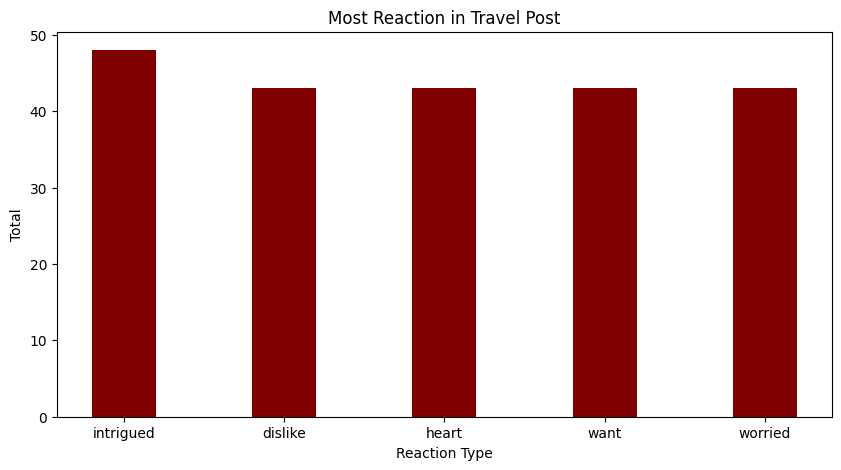

In [ ]:
fig = plt.figure(figsize = (10, 5))

React_Type = most_react['Reaction Type'].head(5)
Total = most_react['Content ID'].head(5)

# creating the bar plot
plt.bar(React_Type, Total, color ='maroon', width = 0.4)

plt.xlabel("Reaction Type")
plt.ylabel("Total")
plt.title("Most Reaction in Travel Post")
plt.show()

###What was the month with the most posts?

In [ ]:
clean2.head()

,Content ID,User ID,Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58


In [ ]:
clean2['Month'] = pd.to_datetime(clean2['Datetime']).dt.month
clean2['Year'] = pd.to_datetime(clean2['Datetime']).dt.year

In [ ]:
clean2.head()

,Content ID,User ID,Type,Datetime,Month,Year
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,11,2020
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,6,2021
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,4,2021
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,1,2021
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,8,2020


In [ ]:
most_post = clean2.groupby(['Year','Month'])['Content ID'].nunique().reset_index()

In [ ]:
most_post = most_post.sort_values(['Year', 'Month'],
              ascending = [True, True])

In [ ]:
most_post

,Year,Month,Content ID
0,2020,6,511
1,2020,7,752
2,2020,8,760
3,2020,9,740
4,2020,10,753
5,2020,11,756
6,2020,12,745
7,2021,1,769
8,2021,2,735
9,2021,3,740
